In [3]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import numpy as np
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import gensim
import numpy as np
import matplotlib.pyplot as plt

In [4]:
sid_obj = SentimentIntensityAnalyzer()

In [5]:
final_translations_2020_2021 = list(pd.read_csv("final_translations_2020_2021_df.csv")['tweets'])
final_translations_2021_2022 = list(pd.read_csv("final_translations_2021_2022_df.csv")['tweets'])

In [6]:
vectorized_sents_2020_2021 = []
sentences_parallel_list_2020_2021 = []
neutral_sents = []
pure_pos = []
pure_neg = []
neg = 0
pos = 0
for sent1 in final_translations_2020_2021:
    score_=[]
    final_sentiments = sid_obj.polarity_scores(sent1)
    score_.append(final_sentiments['pos'])
    score_.append(final_sentiments['neg'])
    if(final_sentiments['pos'] == 0 and final_sentiments['neg'] == 0):
        neutral_sents.append(sent1)
    elif(final_sentiments['neg'] == 0):
        pure_pos.append(sent1)
    elif(final_sentiments['pos'] == 0):
        pure_neg.append(sent1)
        
    if(final_sentiments['pos'] > final_sentiments['neg']):
        pos+=1
    elif(final_sentiments['pos'] < final_sentiments['neg']):
        neg+=1
        
    vectorized_sents_2020_2021.append(score_)
    sentences_parallel_list_2020_2021.append(sent1)

# index 0 is pos and 1 is neg 
print(neg)
print(pos)

3264
586


In [7]:
vectorized_sents_2021_2022 = []
sentences_parallel_list_2021_2022 = []
neutral_sents = []
pure_pos = []
pure_neg = []
pos=0
neg=0
for sent1 in final_translations_2021_2022:
    score_=[]
    final_sentiments = sid_obj.polarity_scores(sent1)
    score_.append(final_sentiments['pos'])
    score_.append(final_sentiments['neg'])
    if(final_sentiments['pos'] == 0 and final_sentiments['neg'] == 0):
        neutral_sents.append(sent1)
    elif(final_sentiments['neg'] == 0):
        pure_pos.append(sent1)
    elif(final_sentiments['pos'] == 0):
        pure_neg.append(sent1)
        
    if(final_sentiments['pos'] > final_sentiments['neg']):
        pos+=1
    elif(final_sentiments['pos'] < final_sentiments['neg']):
        neg+=1
        
    vectorized_sents_2021_2022.append(score_)
    sentences_parallel_list_2021_2022.append(sent1)


print(pos)
print(neg)

923
5081


In [8]:
vectorized_sents_arr_2020_2021 = np.array(vectorized_sents_2020_2021)
x_2020_2021 = vectorized_sents_arr_2020_2021[:,0] # positive
y_2020_2021 = vectorized_sents_arr_2020_2021[:,1] # negative

Text(0, 0.5, ' Negative ')

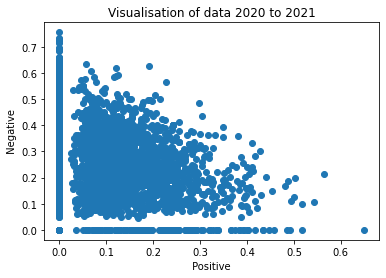

In [9]:
plt.title("Visualisation of data 2020 to 2021")
plt.scatter(x=x_2020_2021, y=y_2020_2021)
plt.xlabel(" Positive ")
plt.ylabel(" Negative ")

In [10]:
vectorized_sents_arr_2021_2022 = np.array(vectorized_sents_2021_2022)
x_2021_2022 = vectorized_sents_arr_2021_2022[:,0] # positive
y_2021_2022 = vectorized_sents_arr_2021_2022[:,1] # negative

Text(0, 0.5, ' Negative ')

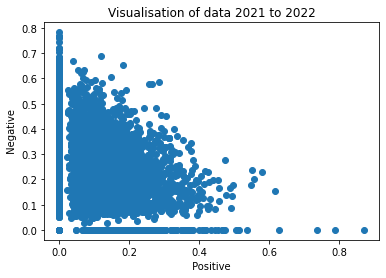

In [11]:
plt.title("Visualisation of data 2021 to 2022")
plt.scatter(x=x_2021_2022, y=y_2021_2022)
plt.xlabel(" Positive ")
plt.ylabel(" Negative ")

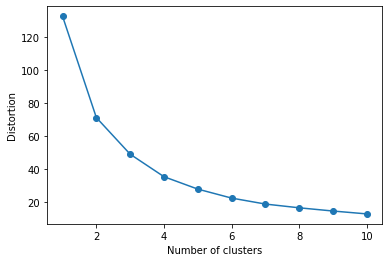

In [12]:
# elbow method to find best number of clusters
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='k-means++',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(vectorized_sents_arr_2020_2021)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

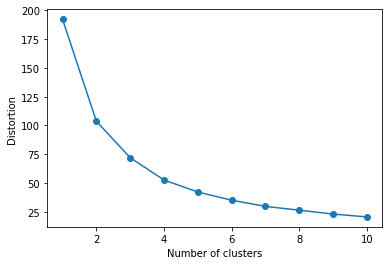

In [13]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='k-means++',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(vectorized_sents_arr_2021_2022)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [35]:
km_model_2020_2021 = KMeans(n_clusters=4, init="k-means++")
km_model_2021_2022 = KMeans(n_clusters=4, init="k-means++")

In [15]:
y_km_2020_2021 = km_model_2020_2021.fit(vectorized_sents_arr_2020_2021)
print(len(y_km_2020_2021.labels_))

4168


In [16]:
final_top_words = {}
for i in range(4):
    d = y_km_2020_2021.transform(vectorized_sents_arr_2020_2021)[:, i]
    ind = np.argsort(d)[::][:50]
    final_list = [sentences_parallel_list_2020_2021[k] for k in ind]
    dict1 = {}
    f_dict = {}
    for j in final_list:
        for z in j.split(' '):
            if z in dict1.keys():
                dict1[z]+=1
            else:
                dict1[z] = 1
     

    dict2 = sorted(dict1, key=dict1.get)
 
    for w in dict2:
        f_dict[w] = dict1[w]
    
    #print(f_dict)
    #print(dict1)
    #sortdict = dict(dict1)
    #print(sortdict)
    x = list(f_dict.keys())
    #print(x)
    final_top_words[i] = x[-100:]
    
print(final_top_words)

# red  - 0
# green - 2
# yellow -1 
# blue - 3 

{0: ['single', 'world.', 'see', 'past', 'lockdown', 'wars', 'another', 'also', 'died', 'years', 'so', 'things', 'planned', 'burnt', 'policemen', 'shaheen', 'innocent', 'real', 'muslims,', 'mob', 'think', 'book', 'arrested', 'arrest', 'to', 'ne', 'terrorist', 'woh', 'congress', 'hai', 'this', 'gave', 'lives', '1984', 'recent', 'citizenship', 'foe', 'baat', 'rahe', 'bjp', 'last', 'aap', 'something', 'mishra', 'getting', 'one', '@narendramodi', 'behind', '2002', 'dear', '', 'protests,', 'nrc', 'take', 'leader', 'unfairly', 'budget', 'false', 'allegation', 'indian', 'you', 'kar', '@amitshah', 'virus', 'killing', 'hate', 'and', 'two', 'protesting', 'like', 'he', 'r', 'delhi.', 'riots,', 'bangalore', 'in', 'killed', 'toh', 'who', '?', 'talk', 'farmers', 'muslims', 'i', 'police', ',', 'u', 'ki', 'muslim', 'india', 'time', 'many', 'caa', '-', 'the', 'riot', '&', 'people', 'riots', 'delhi'], 1: ['mara', 'kyu', 'control', 'asked', 'inc', 'rhi', 'gujrat', 'tak', 'tumne', 'hu', 'kissan', 'the', 'a

In [36]:
y_km_2021_2022 = km_model_2021_2022.fit(vectorized_sents_arr_2021_2022)

In [41]:
y_km_2021_2022.cluster_centers_

array([[0.23361563, 0.18202734],
       [0.03753841, 0.44441862],
       [0.04368647, 0.07376403],
       [0.04370184, 0.26227381]])

In [44]:
# rygb
y_km_2020_2021.cluster_centers_

array([[0.04214766, 0.27010837],
       [0.03464223, 0.06136536],
       [0.0336    , 0.46135254],
       [0.2278523 , 0.18921116]])

In [38]:
final_top_words = {}
for i in range(4):
    d = y_km_2021_2022.transform(vectorized_sents_arr_2021_2022)[:, i]
    ind = np.argsort(d)[::][:50]
    final_list = [sentences_parallel_list_2021_2022[k] for k in ind]
    dict1 = {}
    f_dict = {}
    for j in final_list:
        for z in j.split(' '):
            if z in dict1.keys():
                dict1[z]+=1
            else:
                dict1[z] = 1
     

    dict2 = sorted(dict1, key=dict1.get)
 
    for w in dict2:
        f_dict[w] = dict1[w]
    
 
    x = list(f_dict.keys())

    final_top_words[i] = x[-100:]
    
print(final_top_words)



{0: ['man', 'come', 'place', 'luck', 'hear', '11', 'july', "police's", 'plea', 'challenging', 'granted', 'ishrat', 'jahan', '59/2020', 'alleges', 'larger', 'conspiracy', 'bench', 'headed', 'siddharth', 'mridul.', 'ones', 'but', 'creating', 'investigation', 'casual,', 'callous', "violence'.", 'gujrat', 'want', 'social', 'media', 'let', 'dissenters', 'this', 'make', 'coming', '@ani', ',', 'free', 'dalits', 'accepted', 'no', 'they', 'party', 'even', 'you', '@narendramodi', 'why', 'justice', 'heard', '&', 'case', 'atleast', 'time', 'bail', '@arvindkejriwal', 'support', 'be', 'roaming', '?', 'riot', 'capital', 'best', 'mumbai', 'else', 'never', 'high', 'fir', 'matter', 'suo-motu', 'cognizance', '#delhiriots', 'role', 'home', 'order', 'congress', 'love', 'still', '-', 'and', 'is', 'not', 'of', 'also', 'done', 'aap', 'supreme', 'take', 'to', 'law', 'people', 'police', 'riots.', 'i', 'court', 'like', 'the', 'riots', 'delhi'], 1: ['from', 'failure', 'shame', 'bhakt', 'netas', 'victims.', 'congr

In [20]:
def ClusterIndicesNumpy(clustNum, labels_array): 
    return np.where(labels_array == clustNum)[0]



print(y_km_2021_2022.labels_[2])
print(x_2021_2022[2])
print(y_2021_2022[2])

3
0.128
0.389


Text(0, 0.5, 'negative')

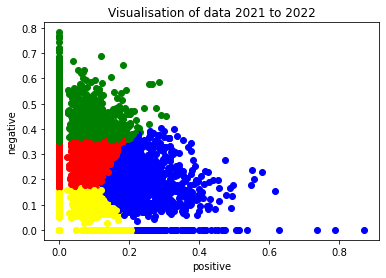

In [40]:

plt.title("Visualisation of data 2021 to 2022")

for i in range(len(y_km_2021_2022.labels_)):
    if(y_km_2021_2022.labels_[i] == 0):
        plt.scatter(x = x_2021_2022[i], 
                    y = y_2021_2022[i],                             
                    c='blue') 
    elif(y_km_2021_2022.labels_[i] == 1):
        plt.scatter(x = x_2021_2022[i], 
                    y = y_2021_2022[i],                             
                    c='green') 
    elif(y_km_2021_2022.labels_[i] == 2):
        plt.scatter(x = x_2021_2022[i], 
                    y = y_2021_2022[i],                             
                    c='yellow') 
    elif(y_km_2021_2022.labels_[i] == 3):
        plt.scatter(x = x_2021_2022[i], 
                    y = y_2021_2022[i],                             
                    c='red') 

plt.xlabel("positive")
plt.ylabel("negative")




4168


Text(0, 0.5, 'negative')

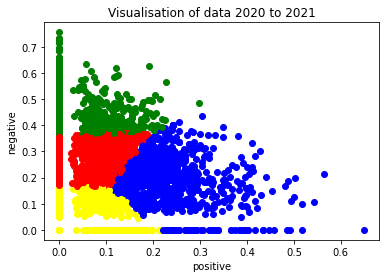

In [22]:

plt.title("Visualisation of data 2020 to 2021")
print(len(y_km_2020_2021.labels_))


for i in range(len(y_km_2020_2021.labels_)):
    if(y_km_2020_2021.labels_[i] == 0):
        plt.scatter(x = x_2020_2021[i], 
                    y = y_2020_2021[i],                             
                    c='red') 
    elif(y_km_2020_2021.labels_[i] == 1):
        plt.scatter(x = x_2020_2021[i], 
                    y = y_2020_2021[i],                             
                    c='yellow') 
    elif(y_km_2020_2021.labels_[i] == 2):
        plt.scatter(x = x_2020_2021[i], 
                    y = y_2020_2021[i],                             
                    c='green') 
    elif(y_km_2020_2021.labels_[i] == 3):
        plt.scatter(x = x_2020_2021[i], 
                    y = y_2020_2021[i],                             
                    c='blue') 
                    
plt.xlabel("positive")
plt.ylabel("negative")

In [59]:
def word_polarity_checker_2021_2022(word):
    total_pos = 0
    total_neg = 0
    total_neut = 0
  

    for i in final_translations_2021_2022:
        for z in i.split():
            if z == word:
                sentiments = sid_obj.polarity_scores(i)
                if(sentiments['compound'] >= 0.05):
                    total_pos+=1
                elif(sentiments['compound'] <= -0.05):
                    total_neg+=1
                elif(sentiments['compound'] > -0.05 and sentiments['compound'] < 0.05):
                    total_neut+=1
        
   
    print("Percentage of positive 2021_2022: " + str((total_pos/(total_pos+total_neg+total_neut))))

In [60]:
def word_polarity_checker_2020_2021(word):
    total_pos = 0
    total_neg = 0
    total_neut = 0
  

    for i in final_translations_2020_2021:
        for z in i.split():
            if z == word:
                sentiments = sid_obj.polarity_scores(i)
                if(sentiments['compound'] >= 0.05):
                    total_pos+=1
                elif(sentiments['compound'] <= -0.05):
                    total_neg+=1
                elif(sentiments['compound'] > -0.05 and sentiments['compound'] < 0.05):
                    total_neut+=1
        
   
    print("Percentage of positive 2020_2021: " + str((total_pos/(total_pos+total_neg+total_neut))))

In [61]:
political_figures= ["@narendramodi", "@arvindkejriwal", "congress", "aap", "@amitshah", "rss", "@kapilmishra_ind"]
for i in political_figures:
    print("For " + i + "=========")
    word_polarity_checker_2021_2022(i)
    word_polarity_checker_2020_2021(i)
    print("============================")

For @narendramodi=========
Percentage of positive 2021_2022: 0.08771929824561403
Percentage of positive 2020_2021: 0.13392857142857142
For @arvindkejriwal=========
Percentage of positive 2021_2022: 0.23985239852398524
Percentage of positive 2020_2021: 0.19148936170212766
For congress=========
Percentage of positive 2021_2022: 0.16489361702127658
Percentage of positive 2020_2021: 0.17142857142857143
For aap=========
Percentage of positive 2021_2022: 0.17829457364341086
Percentage of positive 2020_2021: 0.14482758620689656
For @amitshah=========
Percentage of positive 2021_2022: 0.14193548387096774
Percentage of positive 2020_2021: 0.19791666666666666
For rss=========
Percentage of positive 2021_2022: 0.04807692307692308
Percentage of positive 2020_2021: 0.06201550387596899
For @kapilmishra_ind=========
Percentage of positive 2021_2022: 0.21839080459770116
Percentage of positive 2020_2021: 0.28703703703703703
